In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [5]:
# importar os dados
iris = pd.read_csv('iris.csv')

# primeiras linhas dos dados
print(iris.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [7]:
# separar as features e a coluna de classe
X = iris[['sepal length', 'sepal width', 'petal length', 'petal width']].values  # características
y = iris['class']  # espécies que existem no dataset para comparação

In [9]:
# executar o K-means com 3 clusters (tem pelo menos 3 espécies certo?)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [12]:
# comparar clusters com as classes verdadeiras
# mapear cada cluster para a classe mais comum (modo) associada a ele
labels = np.zeros_like(y_kmeans, dtype=object) # array com o mesmo formato do y_kmeans (predição dos clusters do K-means)
for i in range(3):  # i representa o índice; temos 3 clusters (0, 1 e 2)
    mask = (y_kmeans == i) # quais pontos pertecem ao cluster i
    unique_classes, counts = np.unique(y[mask], return_counts=True) # calcular a classe mais comum
    labels[mask] = unique_classes[np.argmax(counts)]  # é uma linha que cria uma máscara booleana que identifica quais amostras pertencem ao cluster específico (i)
    #  se y_means for [0, 1, 2, 1, 0] e i = 0, então [true, false, false, false, true]; a primeira e a última são do cluster 0

In [13]:
accuracy = accuracy_score(y, labels)
print(f'Acurácia aproximada do K-means: {accuracy:.2f}')

Acurácia aproximada do K-means: 0.89


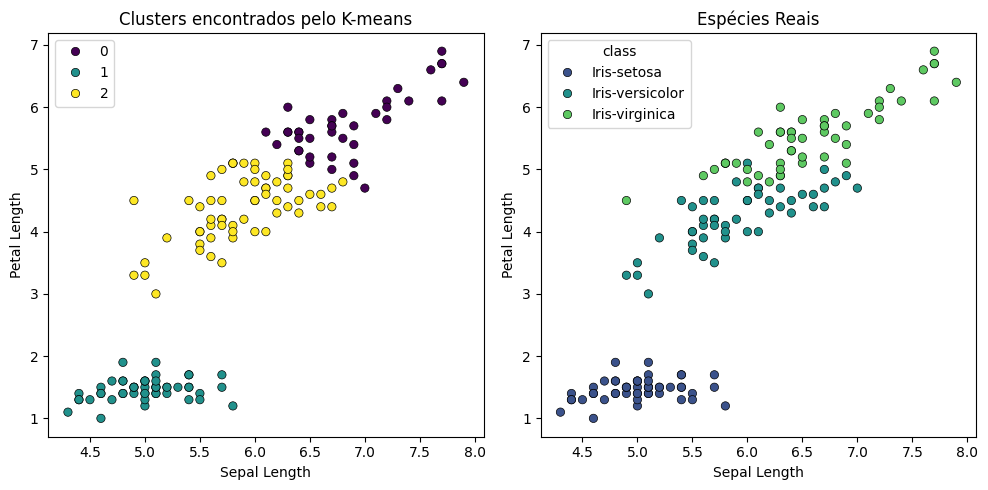

In [14]:
# visualização dos clusters que o K-means trouxe
# gráfico de dispersão
# escolhendo 2 das 4 características para visual.
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, 1 é pra escolher o primeiro espaço
sns.scatterplot(x=X[:, 0], y=X[:, 2], hue=y_kmeans, palette='viridis', edgecolor='k')
plt.title('Clusters encontrados pelo K-means')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# espécies reais para comparação
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 2], hue=y, palette='viridis', edgecolor='k')
plt.title('Espécies Reais')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.tight_layout()
plt.show()

- k-means agrupa dados com base nas distâncias entre pontos em cima das características ('sepal length' e 'petal length'). esses agrupamentos não usam as informações das classes reais durante o treinamento

# Insights
- 3 clusters separadinhos / 3 espécies (iris-setosa, iris-versicolor, iris-virginica)
- agrupamentos bem distintos baseados na 'sepal length' e 'petal length'
- a setosa é o mais separado, versicolor e virginica apesar de bem perto, estão bem separadas
- os gráficos estão bem parecidos; o k-means conseguiu identificar 1 estrutura de agrupamento que se alinha com as espécies reais.
- acurácia de 0,89 tá indicando que o modelo conseguiu "pontuar" os clusters pras classes reais com boa precisão (não é perfeito)

________________________________________________________________________________

# Testando com mais características

carregar os dados, separar as características, testar várias combinações de 2 características e para cada combinação, puxamos o k-means e medimos a acurácia dos clusters formados

In [15]:
iris2 = pd.read_csv('iris.csv')

In [17]:
X = iris2[['sepal length', 'sepal width', 'petal length', 'petal width']].values
y = iris2['class']

In [18]:
# lista de combinações das características
combinacoes = [
    (0, 1),  # sepal length e sepal width
    (0, 2),  # sepal length e petal length
    (0, 3),  # sepal length e petal width
    (1, 2),  # sepal width e petal length
    (1, 3),  # sepal width e petal width
    (2, 3),  # petal length e petal width
]

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42) # grupos

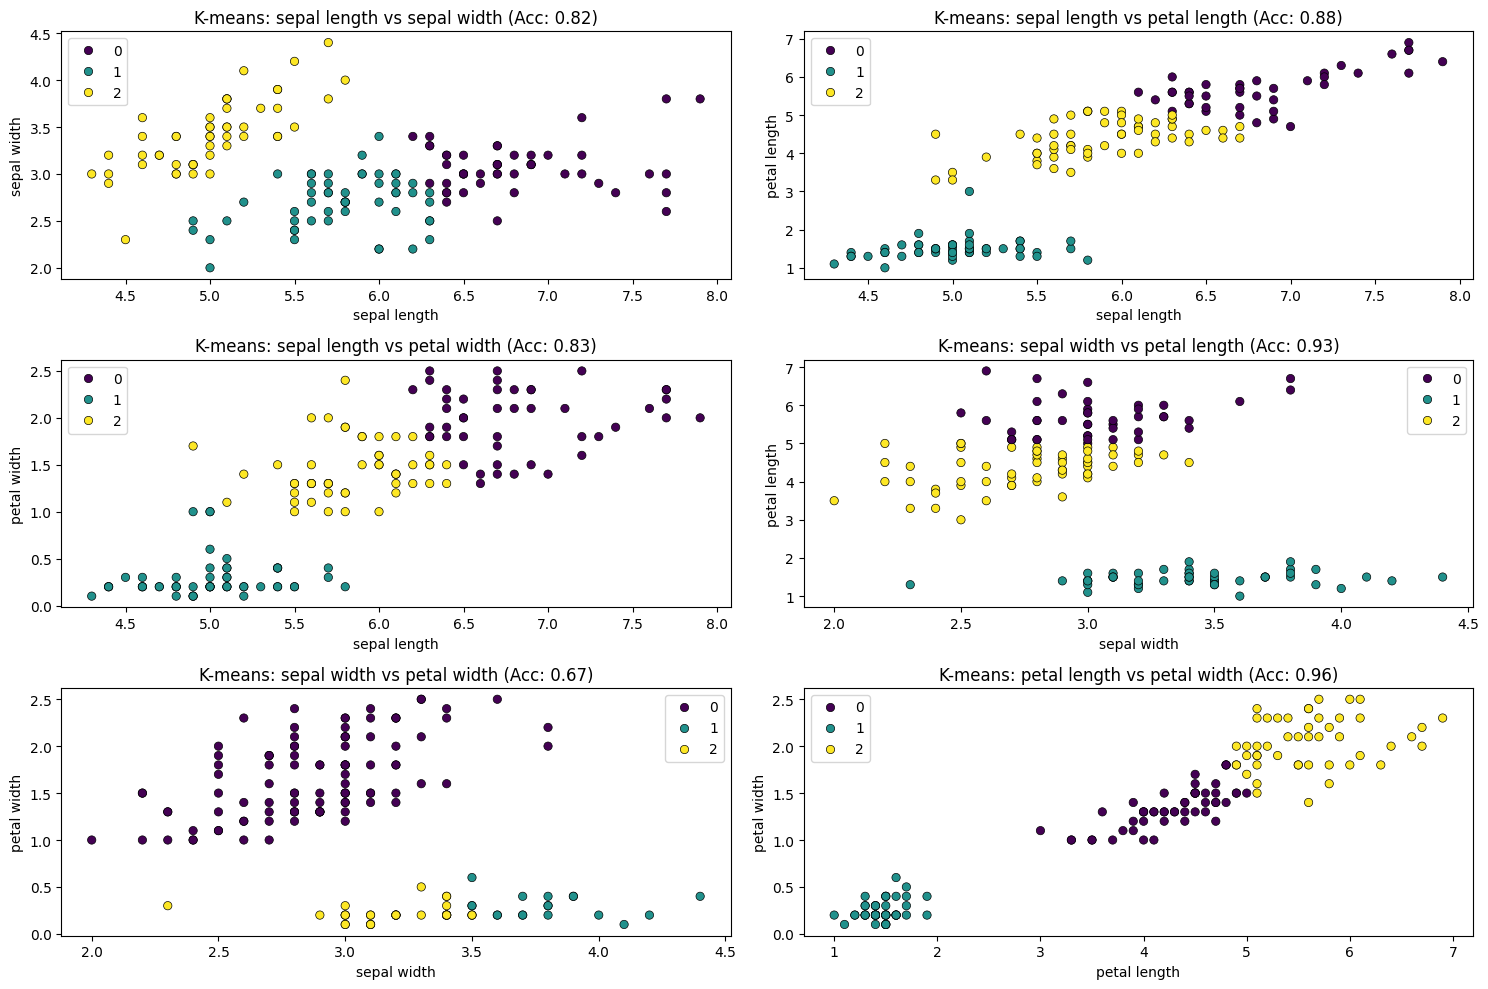

In [22]:
plt.figure(figsize=(15, 10))
for idx, (feature1, feature2) in enumerate(combinacoes):
    X_subset = X[:, [feature1, feature2]] # subset > apenas duas características
    y_kmeans = kmeans.fit_predict(X_subset)
    labels = np.zeros_like(y_kmeans, dtype=object) # mapeamento cluster p/ classe + comum
    for i in range(3):
        mask = (y_kmeans == i)
        unique_classes, counts = np.unique(y[mask], return_counts=True) # qual classe REAL é mais frequente no cluster
        labels[mask] = unique_classes[np.argmax(counts)]
    accuracy = accuracy_score(y, labels) # mede a precisão do k-means comparando com as espécies reais
    plt.subplot(3, 2, idx + 1)
    sns.scatterplot(x=X_subset[:, 0], y=X_subset[:, 1], hue=y_kmeans, palette='viridis', edgecolor='k') # grafico
    plt.title(f'K-means: {iris2.columns[feature1]} vs {iris2.columns[feature2]} (Acc: {accuracy:.2f})')
    plt.xlabel(iris2.columns[feature1])
    plt.ylabel(iris2.columns[feature2])
plt.tight_layout()
plt.show()

# **Conclusão:**
A análise dos gráficos sugere que diferentes combinações de características influenciam significativamente a capacidade do algoritmo K-means de separar os dados em clusters. As melhores separações e maiores precisões foram observadas nas combinações de comprimento e largura da pétala e comprimento da sépala e comprimento da pétala. Já a combinação de largura da sépala e largura da pétala mostrou-se menos eficaz, com maior sobreposição entre clusters.